### Evaluación y perfeccionamiento de un modelo

#### 0.0.1.1. Separación de datos de entrenamiento y prueba

- Separar los datos de entrenamiento y pruebas es fundamental para evaluar correctamente el rendimiento de un modelo.
- Usar una proporción (por ejemplo, 70%-30%) para dividir los datos en entrenamiento y pruebas.

##### 0.1.1.1. Procedimiento: Separación de datos de entrenamiento y prueba

- *Ejemplo aplicado* usando los datos:$'test.csv'$

In [17]:
#Paso 1: Importa la librería necesaria (train_test_split) de scikit-learn.
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos del archivo CSV
file_path = 'test.csv'  # Cambia por tu ruta real al archivo
df = pd.read_csv(file_path, header=0)

# Seleccionar las columnas de interés
x_data = df[['Energy_kcal']]  # Predictor
y_data = df['Protein_g']      # Objetivo

# Dividir datos en entrenamiento (70%) y prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# Ver tamaños de los conjuntos
print(f"Tamaño de entrenamiento: {len(x_train)}")
print(f"Tamaño de prueba: {len(x_test)}")

Tamaño de entrenamiento: 1206
Tamaño de prueba: 518


#### 0.0.1.2. Error de generalización

- Mide qué tan bien un modelo predice datos nunca antes vistos. 
- Usamos los datos de prueba para calcular este error. 
- **Una alta diferencia entre valores reales y pronosticados indica un alto error de generalización.**

##### 0.1.1.2. Procedimiento: Error de generalización

*Ejemplo aplicado* usando los datos:$'test.csv'$

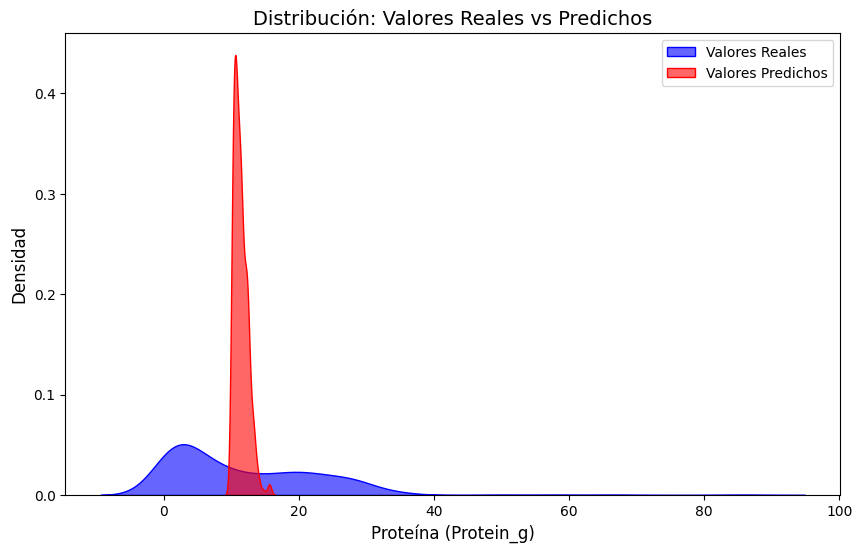

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Realizar predicciones
y_pred = model.predict(x_test)

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Graficar la distribución de los valores reales
sns.kdeplot(y_test, color='blue', label='Valores Reales', fill=True, alpha=0.6)

# Graficar la distribución de los valores predichos
sns.kdeplot(y_pred, color='red', label='Valores Predichos', fill=True, alpha=0.6)

# Etiquetas y título
plt.title('Distribución: Valores Reales vs Predichos', fontsize=14)
plt.xlabel('Proteína (Protein_g)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

##### Análisis de resultados: Error de generalización

*Ejemplo aplicado* usando los datos:$'test.csv'$

- **El diagrama de distribución mostrará dos curvas**: Una para los valores reales (y_test, en azul) y otra para los valores predichos (y_pred, en rojo).
- **Si ambas distribuciones son similares, significa que el modelo predice bien los valores**. Si hay diferencias notables, reflejarán el error de generalización.

#### 0.0.1.3. Validación cruzada 

- La validación cruzada divide los datos en k pliegues (grupos/partes) para entrenar y evaluar el modelo varias veces:

- **Paso a paso validación**
    * En cada iteración, uno de los pliegues se usa como conjunto de prueba y los demás como conjunto de entrenamiento.
    * Esto se repite k veces, cambiando el pliegue de prueba en cada iteración.
    * Cada iteración genera una puntuación de evaluación (como precisión, error cuadrático medio, etc.), que mide qué tan bien predijo el modelo los datos del pliegue de prueba.
    * Al final, promediamos las puntuaciones obtenidas en cada pliegue para obtener una estimación más confiable del desempeño del modelo.


- **Por ejemplo**
  * *Pliegue 1*: Entrenamos con los datos del pliegue 2 y 3, y probamos con los datos del pliegue 1. Obtenemos una puntuación, por ejemplo: 0.85.
  * *Pliegue 2*: Entrenamos con los datos del pliegue 1 y 3, y probamos con los datos del pliegue 2. Obtenemos otra puntuación, por ejemplo: 0.88.
  * *Pliegue 3*: Entrenamos con los datos del pliegue 1 y 2, y probamos con los datos del pliegue 3. Obtenemos otra puntuación, por ejemplo: 0.87.

  * **Puntuaciones por pliegue**: $[0.85, 0.88, 0.87]$.
  * **Promedio de puntuaciones**:$0.8667$ Este promedio es la estimación del desempeño del modelo en datos que nunca ha visto.
  * **Interpretación**: Valores negativos o cercanos a $R² = 0.0$ indican que el modelo no está haciendo buenas predicciones (peor que la media de los datos).

##### 0.1.3.1. Procedimiento: Validación cruzada

*Ejemplo aplicado* usando los datos:$'test.csv'$

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada
scores = cross_val_score(model, x_data, y_data, cv=3 , scoring='r2') #scoring='r2' mide el rendimiento usando el coeficiente de determinación (R^2).

# Resultados de la validación cruzada
print(f"Puntuaciones por pliegue: {scores}")
print(f"Promedio de puntuaciones (R²): {np.mean(scores)}")

Puntuaciones por pliegue: [0.01616728 0.01563124 0.00083281]
Promedio de puntuaciones (R²): 0.010877109133869042


### Sobreadaptación, inadaptación y selección de modelos

*¿Cómo elegir el mejor orden de polinomios y los problemas que surgen al seleccionar un polinomio de orden incorrecto?*

a) **Subajuste (Underfitting)**
- Ocurre cuando el modelo es demasiado simple para capturar la complejidad de los datos.
  
- En este caso, 𝑅^2 en el conjunto de entrenamiento será alto, pero en el conjunto de prueba será bajo.
- *Ejemplo*:
    - 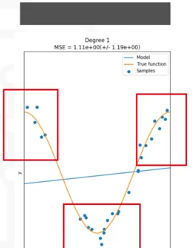

b) **Sobreajuste (Overfitting)**
- Ocurre cuando el modelo es demasiado complejo y ajusta incluso el ruido de los datos.
-  *Ejemplo 4*: intentar ajustar los datos a un polinomio de orden 16.

**Nota**: cuando hay insuficientes datos de entrenamiento la función oscila y sufre un **desajuste**. 
 * **Ejemplo 4**: intentar ajustar los datos a un polinomio de orden 16.
 * -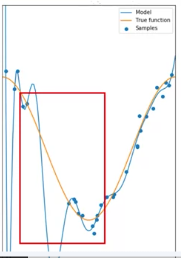

#### 0.0.2.1. Selección del modelo

##### 0.2.2.1.  Realizar una grafica de R² Respecto al orden del polinomio.
- Otra fuente de error es la suposición polinomial.
- Cuanto más cerca esté $R²=1$ más preciso es el modelo.

  **Ejemplo** : el orden óptimo del polinomio es en (3)
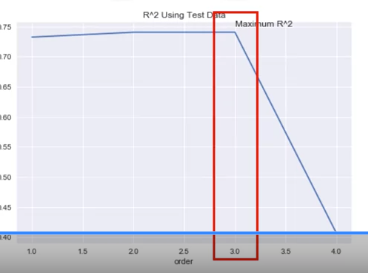

##### 0.2.2.1. Selección del modelo
- **Ejemplo aplicado** : Calcular diferentes valores de R² 

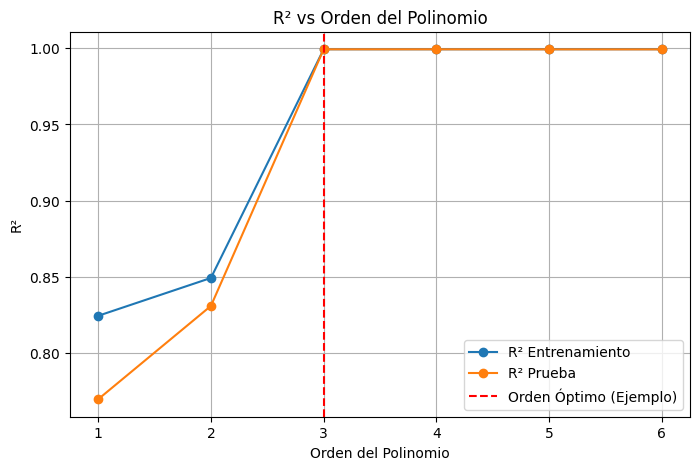

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos de ejemplo
x = np.linspace(-10, 10, 100)  # Variable independiente
y = 2 * x**3 - 5 * x**2 + x + 3 + np.random.normal(0, 20, 100)  # Variable dependiente con ruido

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.3, random_state=42)

# Evaluar diferentes órdenes de polinomios
orders = [1, 2, 3, 4, 5, 6]  # Órdenes a probar
r2_train = []  # R² en entrenamiento
r2_test = []   # R² en prueba

for n in orders:
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Ajustar modelo de regresión lineal
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Calcular R²
    r2_train.append(model.score(x_train_poly, y_train))
    r2_test.append(model.score(x_test_poly, y_test))

# Graficar R² frente al orden del polinomio
plt.figure(figsize=(8, 5))
plt.plot(orders, r2_train, label="R² Entrenamiento", marker='o')
plt.plot(orders, r2_test, label="R² Prueba", marker='o')
plt.axvline(x=3, color='r', linestyle='--', label="Orden Óptimo (Ejemplo)")
plt.xlabel("Orden del Polinomio")
plt.ylabel("R²")
plt.title("R² vs Orden del Polinomio")
plt.legend()
plt.grid()
plt.show()

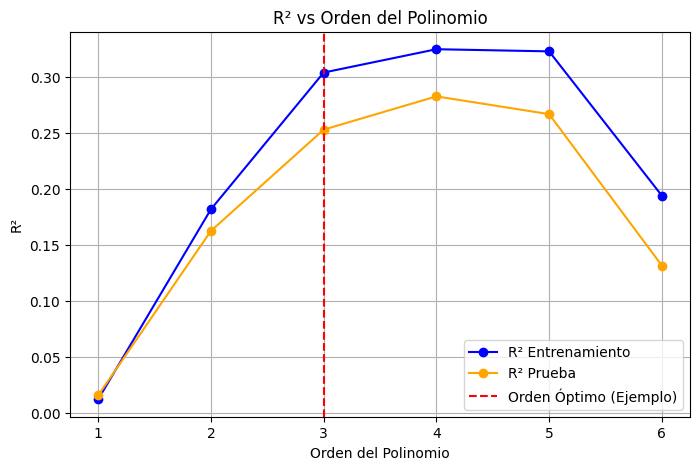

El orden óptimo del polinomio es: 4


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Paso 1: Cargar los datos
file_path = 'test.csv'  # Reemplaza con tu ruta real
df = pd.read_csv(file_path, header=0)

# Paso 2: Seleccionar las columnas de interés
x = df['Energy_kcal'].values.reshape(-1, 1)  # Predictor: Energía calórica
y = df['Protein_g'].values  # Objetivo: Proteína en gramos

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Paso 4: Evaluar diferentes órdenes de polinomios
orders = [1, 2, 3, 4, 5, 6]  # Órdenes de polinomios a probar
r2_train = []  # R² en entrenamiento
r2_test = []   # R² en prueba

for n in orders:
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Ajustar modelo de regresión lineal
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Calcular R²
    r2_train.append(model.score(x_train_poly, y_train))
    r2_test.append(model.score(x_test_poly, y_test))

# Paso 5: Graficar R² frente al orden del polinomio
plt.figure(figsize=(8, 5))
plt.plot(orders, r2_train, label="R² Entrenamiento", marker='o', color='blue')
plt.plot(orders, r2_test, label="R² Prueba", marker='o', color='orange')
plt.axvline(x=3, color='red', linestyle='--', label="Orden Óptimo (Ejemplo)")
plt.xlabel("Orden del Polinomio")
plt.ylabel("R²")
plt.title("R² vs Orden del Polinomio")
plt.legend()
plt.grid()
plt.show()

# Identificar el orden óptimo
optimal_order = orders[np.argmax(r2_test)]
print(f"El orden óptimo del polinomio es: {optimal_order}")


##### 0.2.2.2. Selección del modelo
- **Ejemplo aplicado** : Calcular diferentes valores de R² 

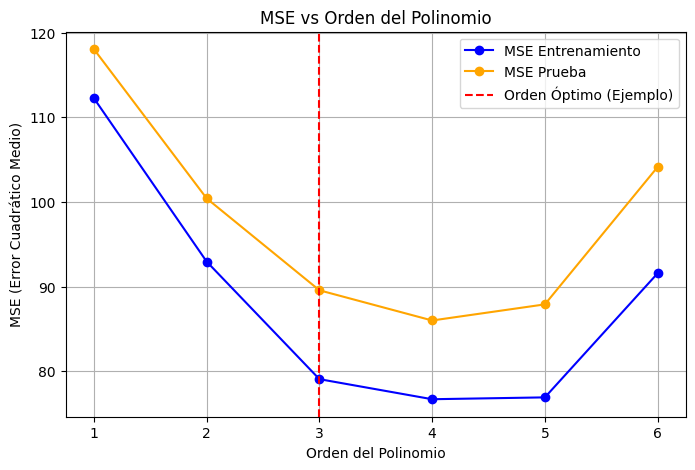

In [35]:
from sklearn.metrics import mean_squared_error

# Paso 1: Inicializar listas para almacenar los valores de MSE
mse_train = []  # MSE en entrenamiento
mse_test = []   # MSE en prueba

# Paso 2: Calcular MSE para diferentes órdenes de polinomios
for n in orders:
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Ajustar modelo de regresión lineal
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Calcular predicciones
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calcular MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Paso 3: Graficar MSE frente al orden del polinomio
plt.figure(figsize=(8, 5))
plt.plot(orders, mse_train, label="MSE Entrenamiento", marker='o', color='blue')
plt.plot(orders, mse_test, label="MSE Prueba", marker='o', color='orange')
plt.axvline(x=3, color='red', linestyle='--', label="Orden Óptimo (Ejemplo)")
plt.xlabel("Orden del Polinomio")
plt.ylabel("MSE (Error Cuadrático Medio)")
plt.title("MSE vs Orden del Polinomio")
plt.legend()
plt.grid()
plt.show()


### Regresión Ridge

- La regresión Ridge es una técnica que **previene el sobreajuste (overfitting)**.
- Los coeficientes polinomiales tienen magnitudes grandes en polinomios de orden superior.
- **la regresión de Ridge controla la magnitud de esos coeficientes polinomiales mediante la introducción del parámetro $Alpha$**

  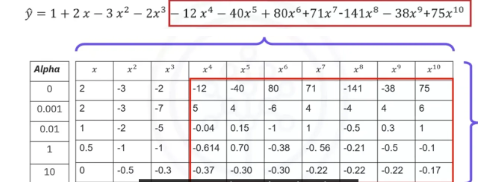

- En el ejemplo anterior:
  * **$α$ muy pequeño (ej. 0)** :Sobreajuste evidente (el modelo se ajusta demasiado a los datos).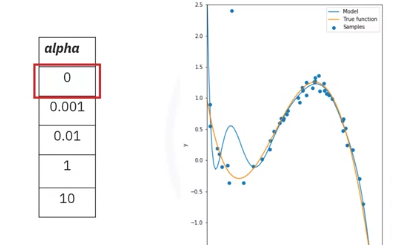
  * **$α$ intermedio (ej. 0.01):** :El modelo captura mejor la función verdadera.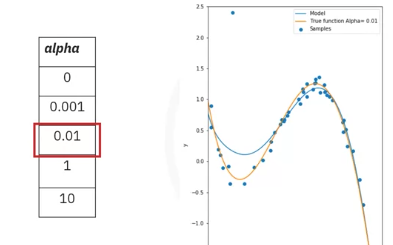
  * **$α$ muy grande (ej. 10)::** :Subajuste (el modelo no es lo suficientemente flexible).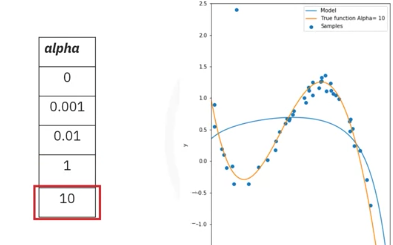

- *Paso 1*: El parámetro alfa se selecciona antes de ajustar o entrenar el modelo.
  
- **Ejemplo** : Ésta tabla representa los coeficientes polinomiales para valores diferentes de **$Alpha$** en la tabla se ven los diferentes coeficientes polinomiales.

- A medida que **$Alpha$ aumenta** los parámetro se hacen pequeños. Eviente en caracteristicas polinomiales de orden superior. 
-  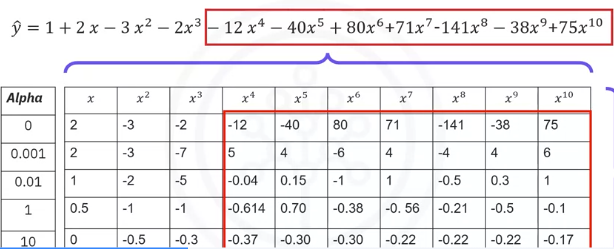

#### 0.0.2.1. Seleccionar $Alpha$

- Para seleccionar $Alfa$ se usa la **Validación cruzada**.

##### 0.2.2.1.Procedimiento para seleccionar alpha que maximice R²
- **Paso 1.** Definir valores iniciales para alpha: (ejemplo: [0.1, 1, 10, 100]).
- **Paso 2.** Entrenar el modelo con cada valor de alpha: Usamos los datos de entrenamiento (X_train, y_train) para ajustar el modelo.
- **Paso 3.** Hacer predicciones en los datos de validación:
Usamos los datos de validación (X_validation, y_validation) para evaluar qué tan bien predice el modelo con cada alpha.
- **Paso 4.** Calcular el R² para cada alpha: Evaluamos el desempeño del modelo calculando R² y guardamos el correspondiente a cada alpha.
- **Paso 6.** Repetir el proceso: Aumentamos el valor de alpha y repetimos los pasos anteriores para entrenar, predecir y calcular R².
- **Paso 7.** Seleccionar el mejor alpha: Elegimos el valor de alpha que maximiza R² (es decir, el que tiene el R² más alto).
- **Paso 8.** Graficar R² vs alpha: Representamos los valores de R² (eje vertical) frente a los valores de alpha (eje horizontal) para visualizar cómo afecta alpha al rendimiento.

**Paso 4. Calcular el R² para cada alpha**
- *Ejemplo aplicado*

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar datos desde el archivo CSV
file_path = 'test.csv'
df = pd.read_csv(file_path, header=0)

# Seleccionar columnas de interés
x_data = df[['Energy_kcal']]  # Variable predictora
y_data = df['Protein_g']      # Variable objetivo

# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# Escalar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Definir el rango de valores para alpha
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Lista para guardar los valores de R²
r2_scores = []

# Entrenar el modelo con cada alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Crear modelo Ridge
    ridge.fit(x_train_scaled, y_train)  # Entrenar modelo
    y_pred = ridge.predict(x_test_scaled)  # Predecir en datos de prueba
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    r2_scores.append(r2)  # Almacenar R²
    print(f"Alpha: {alpha}, R²: {r2:.4f}")

Alpha: 0.0001, R²: 0.0208
Alpha: 0.001, R²: 0.0208
Alpha: 0.01, R²: 0.0208
Alpha: 0.1, R²: 0.0208
Alpha: 1, R²: 0.0208
Alpha: 10, R²: 0.0207
Alpha: 100, R²: 0.0197
Alpha: 1000, R²: 0.0131


 **Paso 7. Seleccionar el mejor alpha**
 - Ejemplo aplicado:

In [47]:
#Paso 7: Seleccionar el mejor (alpha) 
import numpy as np

best_alpha = alphas[np.argmax(r2_scores)]  # Alpha con el mejor R²
print(f"Mejor valor de alpha: {best_alpha}")

#Paso 8: Entrenar el modelo final
# Crear y entrenar modelo final con el mejor alpha
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(x_train, y_train)

# Predicción y evaluación en datos de prueba
final_predictions = ridge_final.predict(x_test)
final_r2 = r2_score(y_test, final_predictions)
print(f"R² final en datos de prueba: {final_r2:.4f}")


Mejor valor de alpha: 0.0001
R² final en datos de prueba: 0.0208


### Grid Search

- scikit-learn permite iterar automáticamente estos hiperparámetros mediante **la validación cruzada**.

#### Seleccionar el mejor hiperparámetro: los datos se dividen en:

a) **Conjunto de entrenamiento** : 
 * Para ajustar el modelo.
 * Entrenar el modelo para diferentes hiperparámetros, usando el error cuadrado o el error cuadrático medio para cada modelo.

b) **Conjunto de validación** : 
 * Sirve para seleccionar los mejores hiperparámetros.
 * Elegir los hiperparámetros que minimicen el error cuadrático medio (ECM) o maximicen el coeficiente $𝑅^2$ en este conjunto.

c) **Conjunto de prueba** :
 *  Sirve para evaluar el rendimiento final del modelo.


In [ ]:
# paso 1. Importar las bibliotecas necesarias
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Paso 2: Dividimos los datos en entrenamiento, validación y prueba:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Paso 3. Crear un diccionario con los parámetros libres
parameters = [{'alpha': [1, 10, 100, 1000]}]

#Paso 4.ridge_model = Ridge()
ridge_model = Ridge()

#Paso 4. Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv=5, scoring='r2')
#scoring: La métrica para evaluar los modelos (en este caso, 𝑅^2 que es la predeterminada).

#Paso 5. Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

#Paso 6. Obtener los mejores parámetros
best_model = grid_search.best_estimator_
#best_estimator_: Devuelve el modelo con los mejores valores para los parámetros libres

#Paso 7. Analizar los resultados
## a) Ver los resultados de validación cruzada:
cv_results = grid_search.cv_results_
#Aquí obtenemos el modelo con los mejores valores de los hiperparámetros basados en la mínima puntuación de MSE 

##b) Imprimir las puntuaciones de cada combinación:
print(cv_results['mean_test_score'])
print(cv_results['params'])

#Paso 8. Evaluar el modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE en el conjunto de prueba: {mse}")

#r2_score = best_model.score(X_test, y_test)
print(f"R² en el conjunto de prueba: {r2_score}")

In [70]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Leer el archivo CSV
df = pd.read_csv('housing.csv')

# Eliminar filas con valores nulos
df.dropna(inplace=True)

df.dtypes
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.dtypes

# Seleccionar características y variable objetivo
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

# Dividir los datos en entrenamiento y prueba (80% / 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir el conjunto temporal en validación y prueba (50% / 50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definir los posibles valores de alpha (hiperparámetro)
parameters = [{'alpha': [1, 10, 100, 1000]}]

# Crear el modelo de regresión Ridge
ridge_model = Ridge()

# Configurar la búsqueda por cuadrícula con validación cruzada (5 pliegues)
grid_search = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Mostrar los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")


Mejores parámetros: {'alpha': 10}
Error cuadrático medio en el conjunto de prueba: 65896816165.30906


In [68]:
# Mostrar el resumen completo de los resultados de la búsqueda
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_alpha', 'mean_test_score', 'std_test_score']])


   param_alpha  mean_test_score  std_test_score
0            1    -6.550406e+10    5.607955e+09
1           10    -6.550404e+10    5.607713e+09
2          100    -6.550454e+10    5.605354e+09
3         1000    -6.555516e+10    5.586386e+09


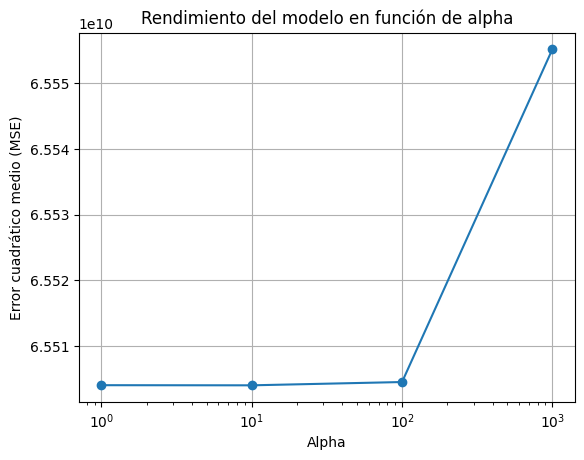

In [71]:
import matplotlib.pyplot as plt

# Graficar el rendimiento (MSE negativo) en función de alpha
plt.plot(results['param_alpha'], -results['mean_test_score'], marker='o')
plt.xscale('log')  # Escala logarítmica para una mejor visualización
plt.xlabel('Alpha')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Rendimiento del modelo en función de alpha')
plt.grid(True)
plt.show()
